In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [6]:
mutation_data = pd.read_csv('full_mutation_data.csv')

In [7]:
mutation_data

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
0,0,MF362760,ND1,upstream_gene_variant,152,T,C,protein_coding,c.-3155T>C,NaN
1,1,MF362760,ND1,upstream_gene_variant,186,C,A,protein_coding,c.-3121C>A,NaN
2,2,MF362760,ND1,upstream_gene_variant,263,A,G,protein_coding,c.-3044A>G,NaN
3,3,MF362760,ND1,upstream_gene_variant,750,A,G,protein_coding,c.-2557A>G,NaN
4,4,MF362760,ND1,upstream_gene_variant,1438,A,G,protein_coding,c.-1869A>G,NaN
...,...,...,...,...,...,...,...,...,...,...
2676,2676,KF540700,ND6,upstream_gene_variant,16223,C,T,protein_coding,c.-1550G>A,NaN
2677,2677,KF540700,ND6,upstream_gene_variant,16242,C,T,protein_coding,c.-1569G>A,NaN
2678,2678,KF540700,ND6,upstream_gene_variant,16249,T,C,protein_coding,c.-1576A>G,NaN
2679,2679,KF540700,ND6,upstream_gene_variant,16319,G,A,protein_coding,c.-1646C>T,NaN


In [8]:
# Filtering the dataset based on the patient origin (Chinese and Armenian)
chinese_patients = mutation_data[mutation_data['Patient'].str.startswith('KF')]
armenian_patients = mutation_data[mutation_data['Patient'].str.startswith('MF')]


# Number of unique mutations
unique_mutations_chinese = chinese_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]
unique_mutations_armenian = armenian_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]

(unique_mutations_chinese, unique_mutations_armenian)


(384, 337)

In [10]:
# Filtering the dataset for mutations in the ND3 gene for both Chinese and Armenian populations
nd3_chinese = chinese_patients[chinese_patients['gene'] == 'ND3']
nd3_armenian = armenian_patients[armenian_patients['gene'] == 'ND3']

# Analyzing ND3 mutations
# 1. Number of unique mutations in ND3 for each population
# 2. Distribution of ND3 mutations across loci
# 3. Types of ND3 gene variants

# Number of unique mutations in ND3
unique_nd3_mutations_chinese = nd3_chinese.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]
unique_nd3_mutations_armenian = nd3_armenian.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]

(unique_nd3_mutations_chinese, unique_nd3_mutations_armenian)


(10, 7)

In [11]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND3 gene
nd3_chinese_synonymous = nd3_chinese[nd3_chinese['gene_variant'] == 'synonymous_variant']
nd3_chinese_missense = nd3_chinese[nd3_chinese['gene_variant'] == 'missense_variant']
nd3_armenian_synonymous = nd3_armenian[nd3_armenian['gene_variant'] == 'synonymous_variant']
nd3_armenian_missense = nd3_armenian[nd3_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS = nd3_chinese_synonymous.shape[0]
chinese_dN = nd3_chinese_missense.shape[0]
armenian_dS = nd3_armenian_synonymous.shape[0]
armenian_dN = nd3_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio = chinese_dN / (chinese_dS + epsilon)
armenian_dN_dS_ratio = armenian_dN / (armenian_dS + epsilon)

(chinese_dN_dS_ratio, armenian_dN_dS_ratio, chinese_dN, chinese_dS, armenian_dN, armenian_dS)


(0.8124999746093758, 0.7999999200000081, 26, 32, 8, 10)

In [28]:
nd3_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
95,95,MF362763,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
178,178,MF362766,ND3,upstream_gene_variant,10034,T,C,protein_coding,c.-25T>C,NaN
179,179,MF362766,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
180,180,MF362766,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
309,309,MF362770,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
385,385,MF362772,ND3,synonymous_variant,10142,C,T,protein_coding,c.84C>T,p.Asn28Asn
419,419,MF362773,ND3,synonymous_variant,10293,C,T,protein_coding,c.235C>T,p.Leu79Leu
420,420,MF362773,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
459,459,MF362774,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
557,557,MF362778,ND3,synonymous_variant,10289,A,G,protein_coding,c.231A>G,p.Trp77Trp


In [14]:
nd3_armenian_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
179,179,MF362766,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
309,309,MF362770,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
385,385,MF362772,ND3,synonymous_variant,10142,C,T,protein_coding,c.84C>T,p.Asn28Asn
419,419,MF362773,ND3,synonymous_variant,10293,C,T,protein_coding,c.235C>T,p.Leu79Leu
459,459,MF362774,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
557,557,MF362778,ND3,synonymous_variant,10289,A,G,protein_coding,c.231A>G,p.Trp77Trp
680,680,MF362782,ND3,synonymous_variant,10142,C,T,protein_coding,c.84C>T,p.Asn28Asn
1010,1010,MF362794,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
1182,1182,MF362802,ND3,synonymous_variant,10217,A,G,protein_coding,c.159A>G,p.Met53Met
1209,1209,MF362804,ND3,synonymous_variant,10217,A,G,protein_coding,c.159A>G,p.Met53Met


In [15]:
nd3_armenian_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
95,95,MF362763,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
180,180,MF362766,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
420,420,MF362773,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
558,558,MF362778,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
715,715,MF362783,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
825,825,MF362788,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
864,864,MF362789,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1159,1159,MF362801,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala


In [12]:
nd3_chinese_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1237,1237,KF540656,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1280,1280,KF540657,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1310,1310,KF540658,ND3,synonymous_variant,10310,G,A,protein_coding,c.252G>A,p.Leu84Leu
1369,1369,KF540660,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
1459,1459,KF540663,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1495,1495,KF540664,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1584,1584,KF540667,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1614,1614,KF540668,ND3,synonymous_variant,10325,G,A,protein_coding,c.267G>A,p.Met89Met
1649,1649,KF540669,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1686,1686,KF540670,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr


In [13]:
nd3_chinese_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1236,1236,KF540656,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1279,1279,KF540657,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1458,1458,KF540663,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1494,1494,KF540664,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1583,1583,KF540667,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1615,1615,KF540668,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1648,1648,KF540669,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1685,1685,KF540670,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1746,1746,KF540672,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1810,1810,KF540674,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala


In [34]:
common_nd3_armenian_cols = nd3_armenian['mutation_nucleotide'].isin(nd3_chinese['mutation_nucleotide'])
common_nd3_armenian_cols
common_nd3_armenian = nd3_armenian.loc[common_nd3_armenian_cols, :]
common_nd3_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
95,95,MF362763,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
179,179,MF362766,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
180,180,MF362766,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
309,309,MF362770,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
420,420,MF362773,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
459,459,MF362774,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
557,557,MF362778,ND3,synonymous_variant,10289,A,G,protein_coding,c.231A>G,p.Trp77Trp
558,558,MF362778,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
715,715,MF362783,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
825,825,MF362788,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala


In [36]:
common_nd3_chinese_cols = nd3_chinese['mutation_nucleotide'].isin(nd3_armenian['mutation_nucleotide'])
common_nd3_chinese_cols
common_nd3_chinese = nd3_chinese.loc[common_nd3_chinese_cols, :]
common_nd3_chinese

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1236,1236,KF540656,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1279,1279,KF540657,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1369,1369,KF540660,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
1458,1458,KF540663,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1494,1494,KF540664,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1583,1583,KF540667,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1615,1615,KF540668,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1648,1648,KF540669,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1685,1685,KF540670,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
1746,1746,KF540672,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala


In [38]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND3 gene
common_nd3_chinese_synonymous = common_nd3_chinese[common_nd3_chinese['gene_variant'] == 'synonymous_variant']
common_nd3_chinese_missense = common_nd3_chinese[common_nd3_chinese['gene_variant'] == 'missense_variant']
common_nd3_armenian_synonymous = common_nd3_armenian[common_nd3_armenian['gene_variant'] == 'synonymous_variant']
common_nd3_armenian_missense = common_nd3_armenian[common_nd3_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
common_chinese_dS = common_nd3_chinese_synonymous.shape[0]
common_chinese_dN = common_nd3_chinese_missense.shape[0]
common_armenian_dS = common_nd3_armenian_synonymous.shape[0]
common_armenian_dN = common_nd3_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
common_chinese_dN_dS_ratio = common_chinese_dN / (common_chinese_dS + epsilon)
common_armenian_dN_dS_ratio = common_armenian_dN / (common_armenian_dS + epsilon)

(common_chinese_dN_dS_ratio, common_armenian_dN_dS_ratio, common_chinese_dN, common_chinese_dS, common_armenian_dN, common_armenian_dS)


(4.9999990000002, 1.599999680000064, 25, 5, 8, 5)

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
95,95,MF362763,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
179,179,MF362766,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
180,180,MF362766,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
309,309,MF362770,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
420,420,MF362773,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
459,459,MF362774,ND3,synonymous_variant,10238,T,C,protein_coding,c.180T>C,p.Ile60Ile
557,557,MF362778,ND3,synonymous_variant,10289,A,G,protein_coding,c.231A>G,p.Trp77Trp
558,558,MF362778,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
715,715,MF362783,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala
825,825,MF362788,ND3,missense_variant,10398,A,G,protein_coding,c.340A>G,p.Thr114Ala


In [52]:
# Create a boolean mask to identify common rows in nd3_armenian
mask = nd3_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_nd3_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
nd3_armenian_unique = nd3_armenian[~mask]

# Display the DataFrame with unique mutations for nd3_armenian
nd3_armenian_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
178,178,MF362766,ND3,upstream_gene_variant,10034,T,C,protein_coding,c.-25T>C,NaN
385,385,MF362772,ND3,synonymous_variant,10142,C,T,protein_coding,c.84C>T,p.Asn28Asn
419,419,MF362773,ND3,synonymous_variant,10293,C,T,protein_coding,c.235C>T,p.Leu79Leu
680,680,MF362782,ND3,synonymous_variant,10142,C,T,protein_coding,c.84C>T,p.Asn28Asn
1182,1182,MF362802,ND3,synonymous_variant,10217,A,G,protein_coding,c.159A>G,p.Met53Met
1209,1209,MF362804,ND3,synonymous_variant,10217,A,G,protein_coding,c.159A>G,p.Met53Met


In [42]:
# Create a boolean mask to identify common rows in nd3_armenian
mask = nd3_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_nd3_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
nd3_chinese_unique = nd3_chinese[~mask]

# Display the DataFrame with unique mutations for nd3_armenian
nd3_chinese_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1237,1237,KF540656,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1280,1280,KF540657,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1310,1310,KF540658,ND3,synonymous_variant,10310,G,A,protein_coding,c.252G>A,p.Leu84Leu
1459,1459,KF540663,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1495,1495,KF540664,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1584,1584,KF540667,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1614,1614,KF540668,ND3,synonymous_variant,10325,G,A,protein_coding,c.267G>A,p.Met89Met
1649,1649,KF540669,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1686,1686,KF540670,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr
1747,1747,KF540672,ND3,synonymous_variant,10400,C,T,protein_coding,c.342C>T,p.Thr114Thr


In [41]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND3 gene
nd3_chinese_synonymous_unique = nd3_chinese_unique[nd3_chinese_unique['gene_variant'] == 'synonymous_variant']
nd3_chinese_missense_unique = nd3_chinese_unique[nd3_chinese_unique['gene_variant'] == 'missense_variant']
nd3_armenian_synonymous_unique = nd3_armenian_unique[nd3_armenian_unique['gene_variant'] == 'synonymous_variant']
nd3_armenian_missense_unique = nd3_armenian_unique[nd3_armenian_unique['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS_unique = nd3_chinese_synonymous_unique.shape[0]
chinese_dN_unique = nd3_chinese_missense_unique.shape[0]
armenian_dS_unique = nd3_armenian_synonymous_unique.shape[0]
armenian_dN_unique = nd3_armenian_missense_unique.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio_unique = chinese_dN_unique / (chinese_dS_unique + epsilon)
armenian_dN_dS_ratio_unique = armenian_dN_unique / (armenian_dS_unique + epsilon)

(chinese_dN_dS_ratio_unique, armenian_dN_dS_ratio_unique, chinese_dN_unique, chinese_dS_unique, armenian_dN_unique, armenian_dS_unique)


(0.037037035665294975, 0.0, 1, 27, 0, 5)

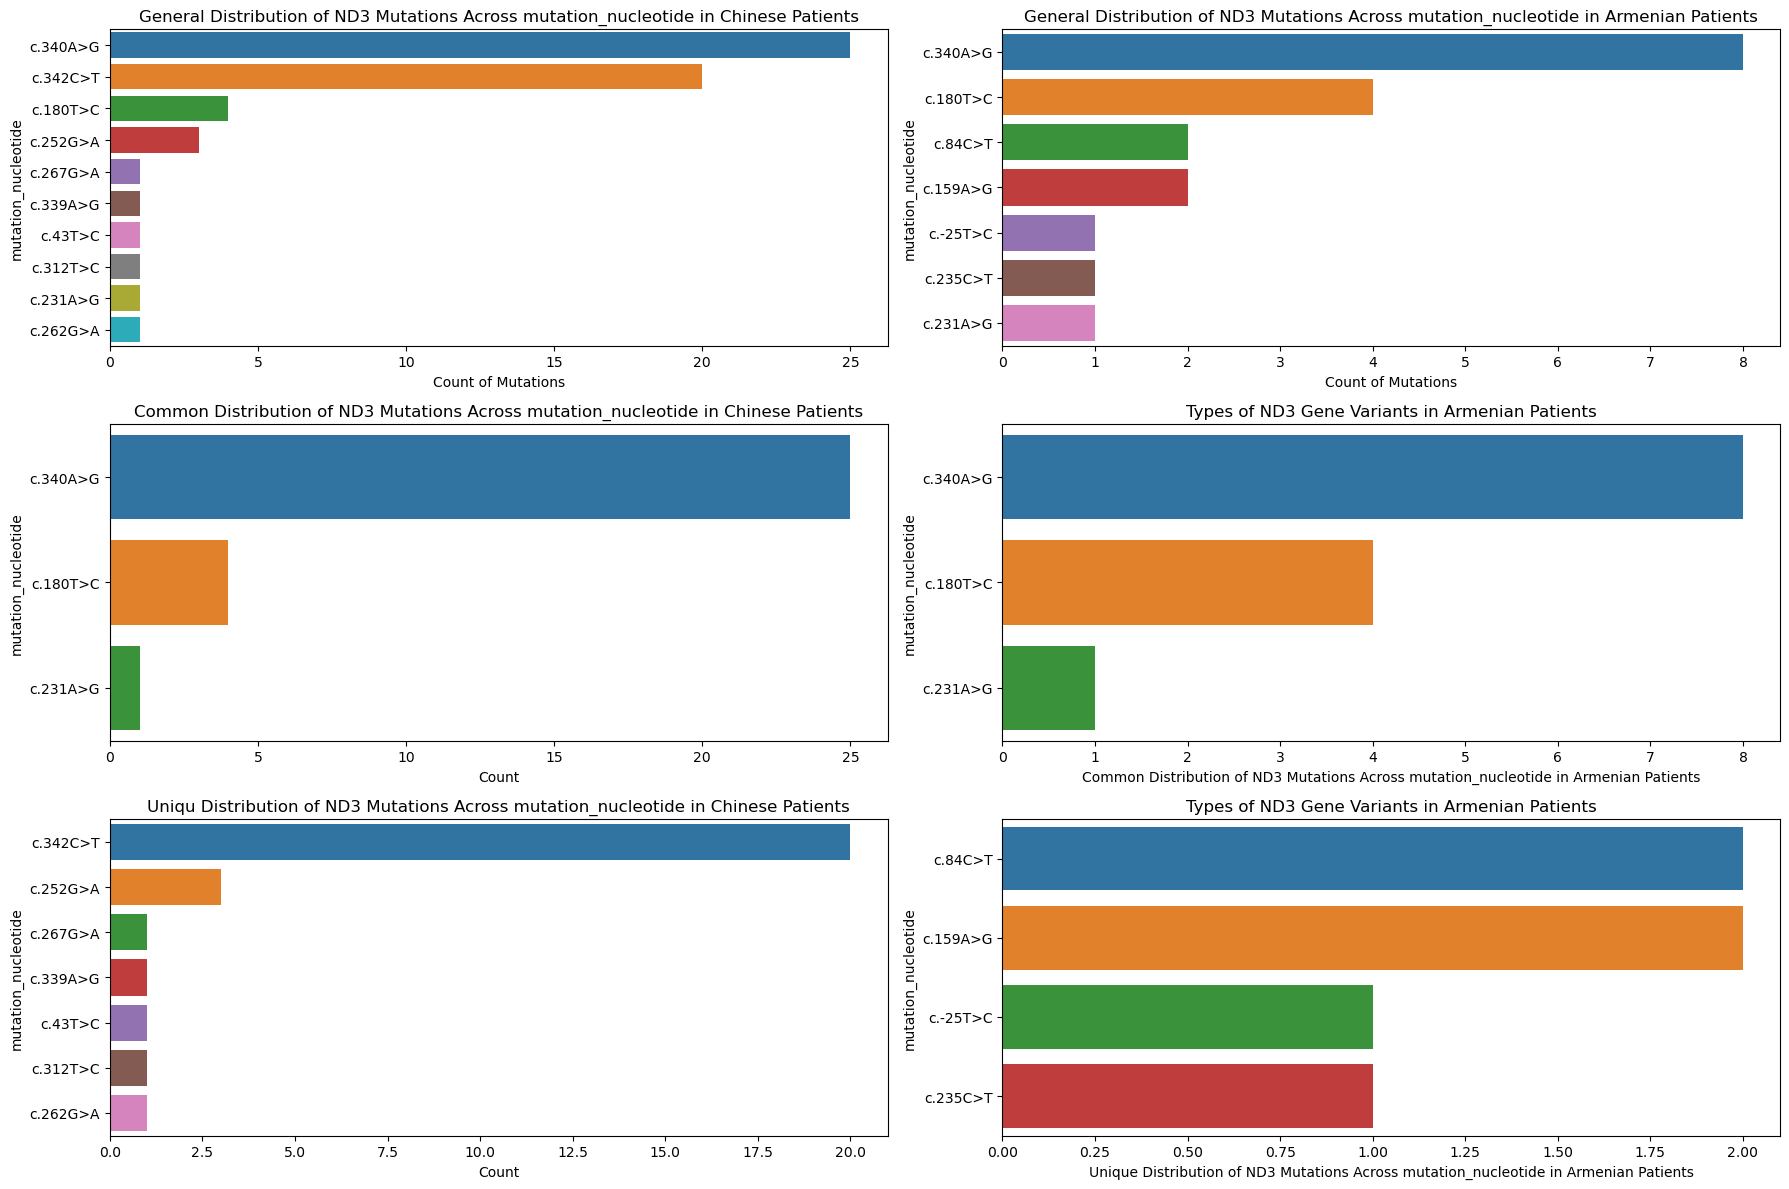

(10, 7)

In [54]:
# Filtering the dataset for mutations in the ND3 gene for both Chinese and Armenian populations
# Analyzing ND3 mutations
# 1. Number of unique mutations in ND3 for each population
# 2. Distribution of ND3 mutations across loci
# 3. Types of ND3 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of ND3 mutations across loci for Chinese patients
sns.countplot(y="mutation_nucleotide", data=nd3_chinese, order=nd3_chinese['mutation_nucleotide'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of ND3 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=nd3_armenian, order=nd3_armenian['mutation_nucleotide'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of ND3 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_nd3_chinese, order= common_nd3_chinese['mutation_nucleotide'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of ND3 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_nd3_armenian, order=common_nd3_armenian['mutation_nucleotide'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Types of ND3 Gene Variants in Armenian Patients')
axes[1, 1].set_xlabel('Common Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of ND3 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=nd3_chinese_unique, order= nd3_chinese_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title('Uniqu Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of ND3 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=nd3_armenian_unique, order=nd3_armenian_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('Types of ND3 Gene Variants in Armenian Patients')
axes[2, 1].set_xlabel('Unique Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()

(unique_nd3_mutations_chinese, unique_nd3_mutations_armenian)


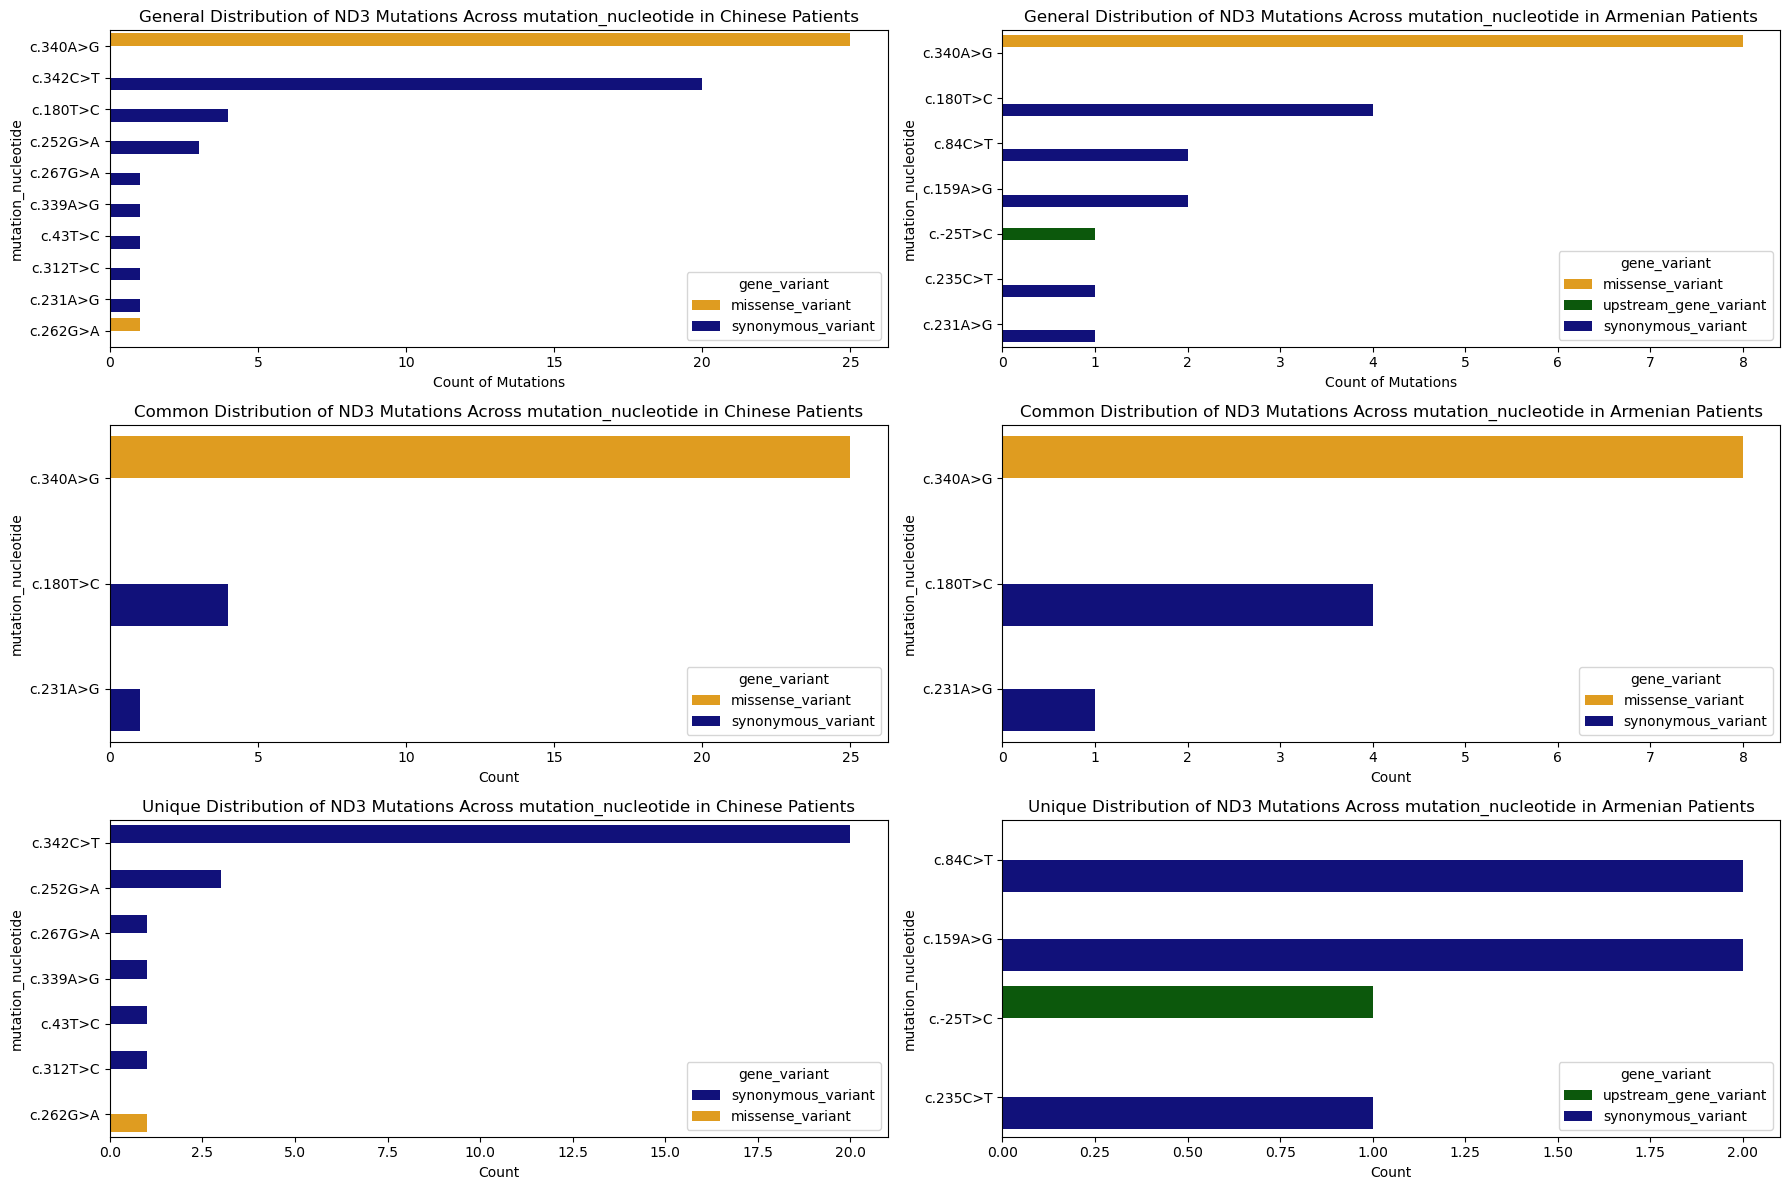

(10, 7)

In [62]:
# Filtering the dataset for mutations in the ND3 gene for both Chinese and Armenian populations
# Analyzing ND3 mutations
# 1. Number of unique mutations in ND3 for each population
# 2. Distribution of ND3 mutations across loci
# 3. Types of ND3 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of ND3 mutations across loci for Chinese patients
hue_column = 'gene_variant'
color_palette = {"synonymous_variant": "darkblue", "missense_variant": "orange", 'upstream_gene_variant': "darkgreen"}
sns.countplot(y="mutation_nucleotide", data=nd3_chinese, order=nd3_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of ND3 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=nd3_armenian, order=nd3_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of ND3 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_nd3_chinese, order= common_nd3_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of ND3 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_nd3_armenian, order=common_nd3_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of ND3 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=nd3_chinese_unique, order= nd3_chinese_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of ND3 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of ND3 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=nd3_armenian_unique, order=nd3_armenian_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of ND3 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()

(unique_nd3_mutations_chinese, unique_nd3_mutations_armenian)


/tmp/ipykernel_98428/203366806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_nd3_chinese['Type'] = 'Common'
/tmp/ipykernel_98428/203366806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd3_chinese_unique['Type'] = 'Unique'
/tmp/ipykernel_98428/203366806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

AttributeError: Rectangle.set() got an unexpected keyword argument 'style'

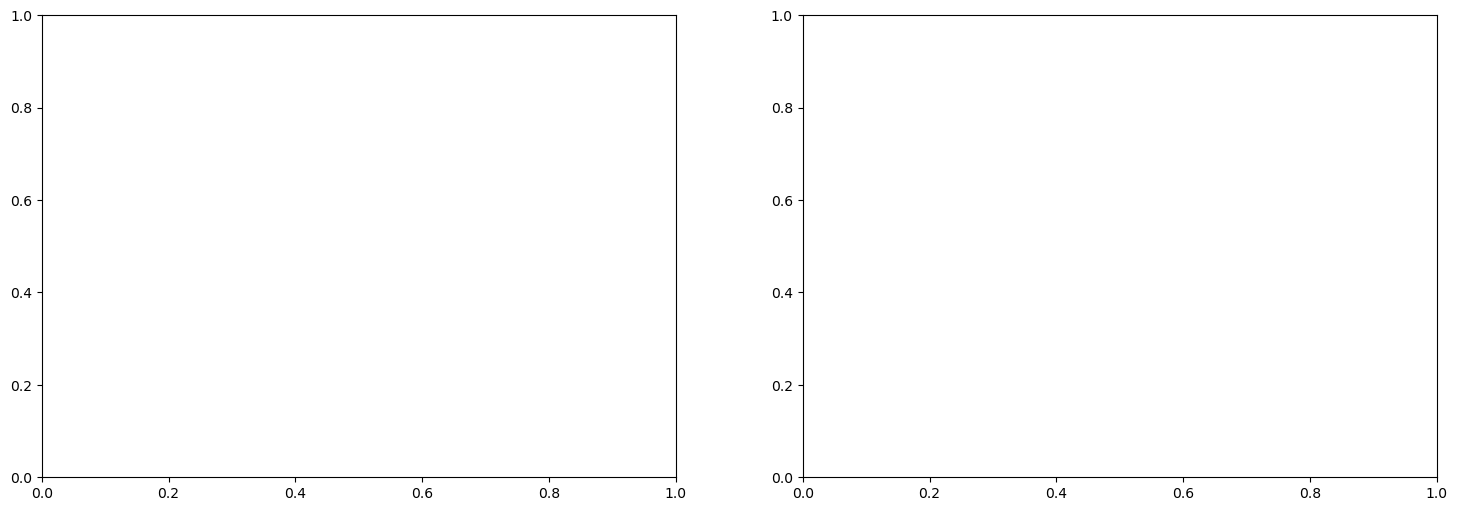